## Project Setup

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
pd.plotting.register_matplotlib_converters()

In [3]:
datasets_dir = str(Path(os.path.abspath('')).parent.joinpath("datasets"))

## Insurange Charges Dataset

### Exploratory Analysis

In [5]:
insurance_df = pd.read_csv(f"{datasets_dir}/insurance.csv")

In [6]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Scatter Plot

Text(0.5, 1.0, 'Insurance Charges over BMI')

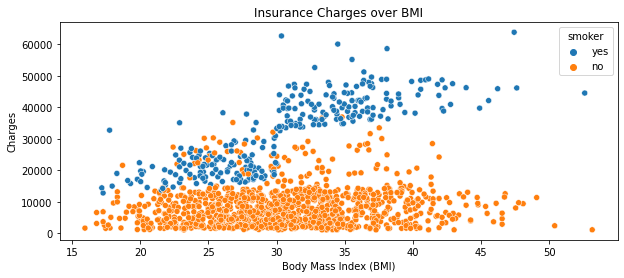

In [41]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=insurance_df['bmi'], 
                y=insurance_df['charges'],
                hue=insurance_df['smoker'])

plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Charges")
plt.title("Insurance Charges over BMI")

### Scatter Plot with Linear Regression Model Line

Text(0.5, 1.0, 'Insurance Charges over BMI')

<Figure size 720x288 with 0 Axes>

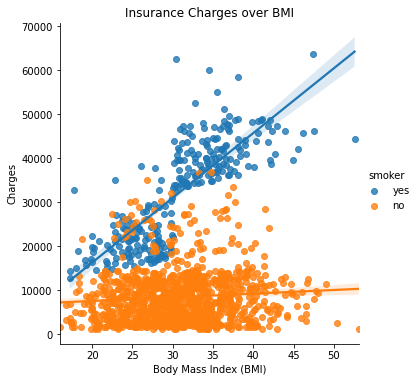

In [38]:
plt.figure(figsize=(10, 4))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_df)

plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Charges")
plt.title("Insurance Charges over BMI")

### Categorical Scatter Plot

/usr/local/conda/envs/default/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Charges over Smoker and Non-smoker')

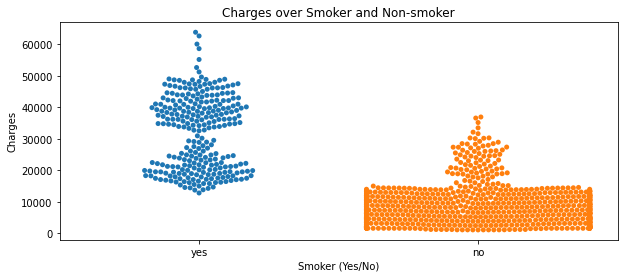

In [39]:
plt.figure(figsize=(10, 4))
sns.swarmplot(x=insurance_df['smoker'],
              y=insurance_df['charges'])

plt.xlabel("Smoker (Yes/No)")
plt.ylabel("Charges")
plt.title("Charges over Smoker and Non-smoker")